# Classification - Decision Tree

In [1]:
#! pip install pydotplus

In [2]:
#! pip install graphviz

If the pip install command is not enough follow the next steps:
- In "Anaconda Prompt" execute the command "conda install graphviz" 
- Add to the PATH: C:\Users\username\Anaconda3\Library\bin\graphviz. To modify PATH goto: Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit > New
- Restart your computer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df = pd.read_csv("./data-tergul6/Titanic_final.csv", index_col=0)
df.head()

Survived  Pclass  SibSp  Parch  Sex_cat  Embarked_cat  Title_cat  Is_Alone  \
0         0       3      1      0        1             2          2         0   
1         1       1      1      0        0             0          3         0   
2         1       3      0      0        0             2          1         1   
3         1       1      1      0        0             2          3         0   
4         0       3      0      0        1             2          2         1   

   Fare_min_max  Age_norm  
0      0.014151 -0.517838  
1      0.139129  0.615799  
2      0.015478 -0.234429  
3      0.103644  0.403242  
4      0.015713  0.403242

Split the data set to X and y.<br>
X for the features and y for the target. 

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

To evaluate the model we split the data set to train set and test set (= validation).<br>
We train the model <b> only </b> on the train set and evaluate it on the test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

Create Decision Tree classifier object, train it on the train set and predict the labels to the test set.<br>

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf = clf.fit(X_train,y_train)

# Predict the label
y_pred = clf.predict(X_test)
# y_pred

Note: sklearn uses an optimised version of the CART algorithm.

#### Acuuracy and confusion matrix:

In [8]:
print(f"accuracy of model : {metrics.accuracy_score(y_test, y_pred)}")
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))


accuracy of model : 0.7443946188340808


0   1
0  103  31
1   26  63

### Decision tree visualization
One of the decision trees advantages is the ability to visualize the decision rules and therefore they are easy to understand and interpret. 

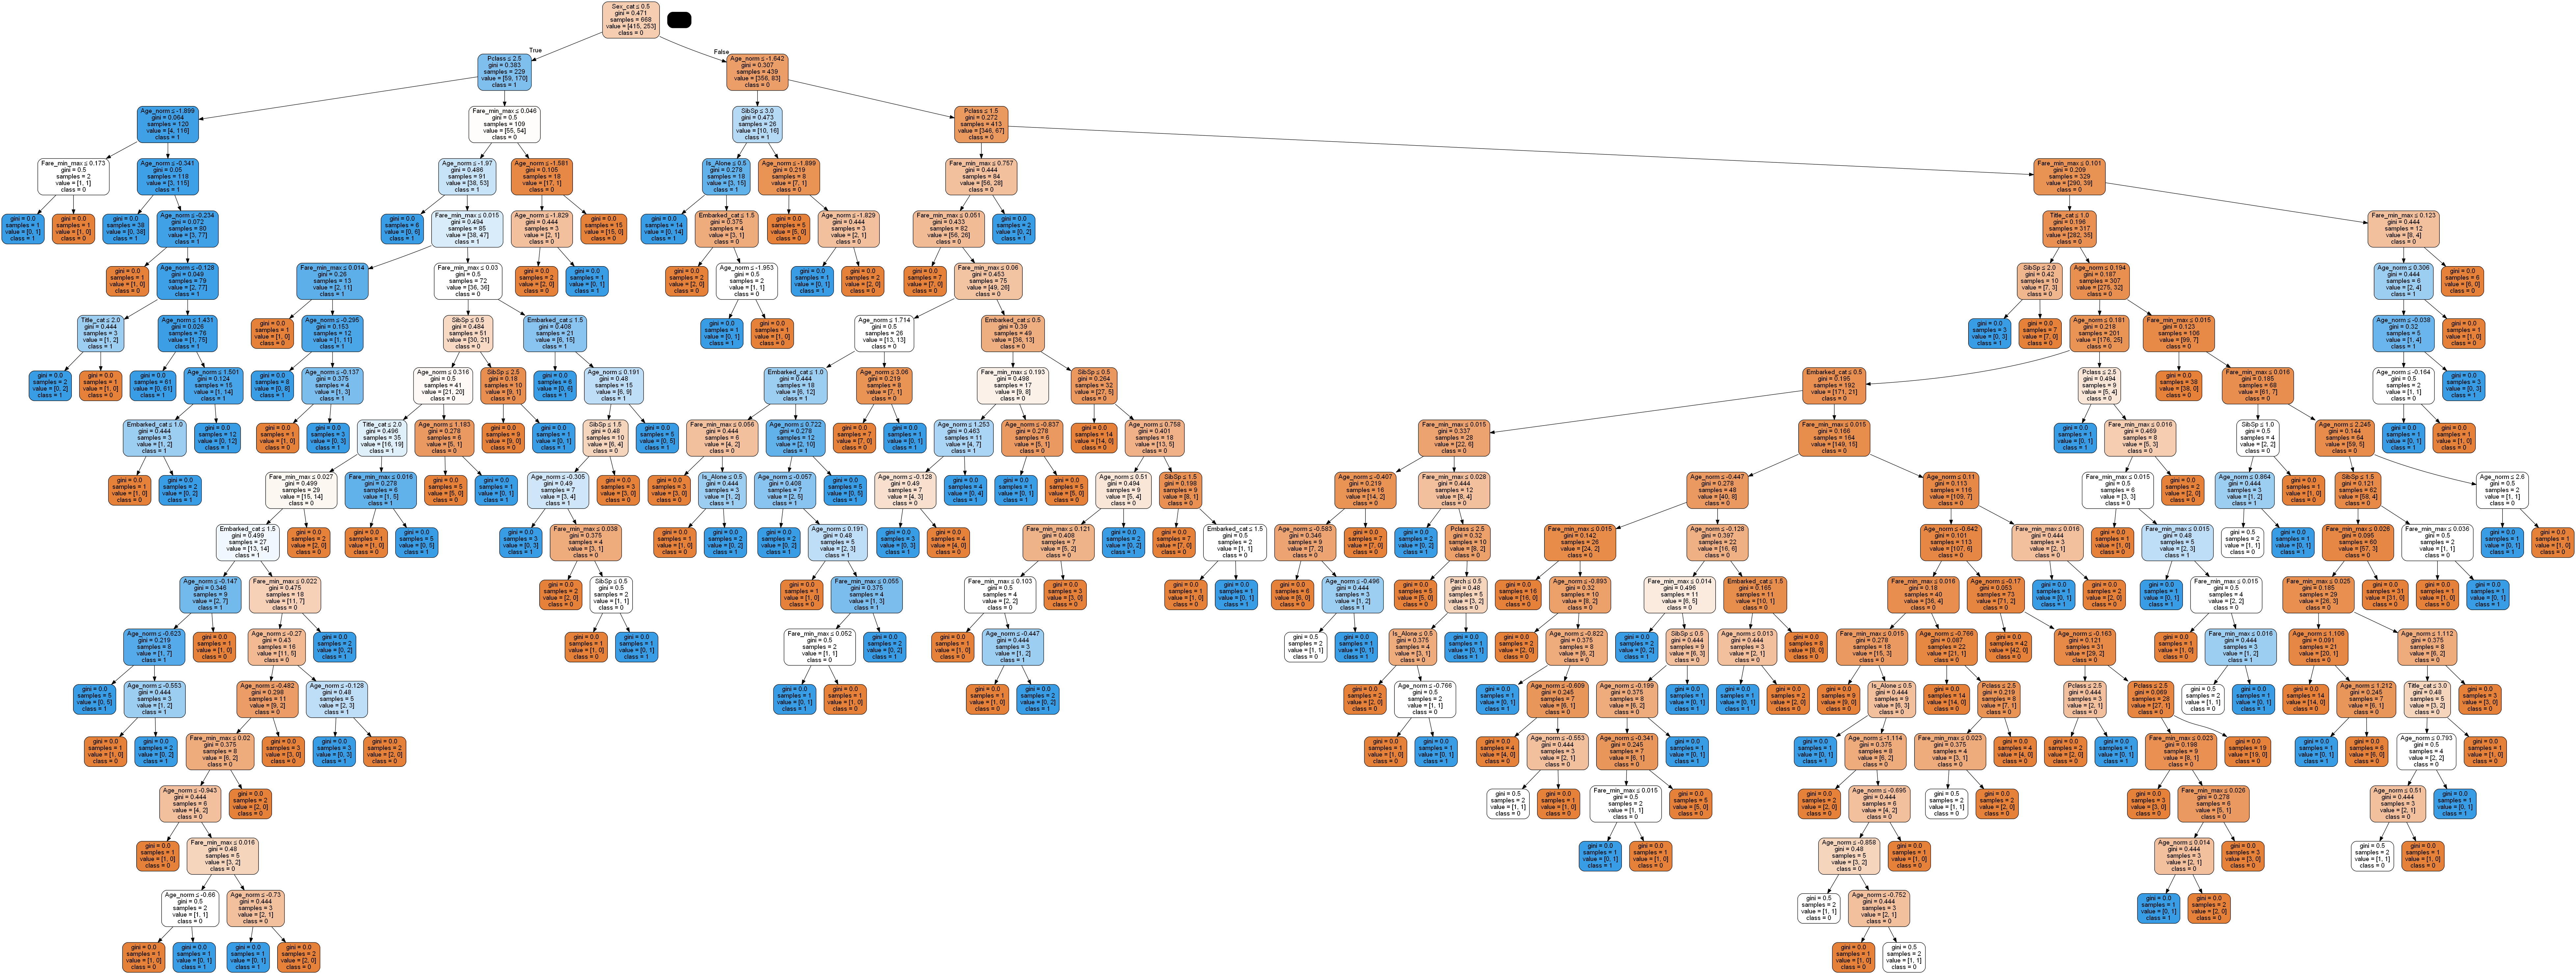

In [9]:
dot = export_graphviz(clf, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('./data-tergul6/tree1.png')
Image(graph.create_png())

#### Predict the labels for the train set

In [10]:
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

0.9880239520958084


0    1
0  415    0
1    8  245

## Overfitting!!
Changing hyper-parameters effects the complexity of the model. Too complex (=deep) model will overfit, too simple (=shallow) model will underfit.<br>
Configure a better model by limits the size of the tree.

**criterion**: Measures the quality of a split ('gini' or 'entropy').<br>
**splitter**: Chooses the strategy used to choose the split at each node ('best' or 'random').<br>
**max_depth**: Specifies the maximum depth of the decision tree.<br>
**min_samples_split**: Specifies the minimum number of samples required to split an internal node.<br>
**min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node.

In [11]:
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf2 = clf2.fit(X_train,y_train)

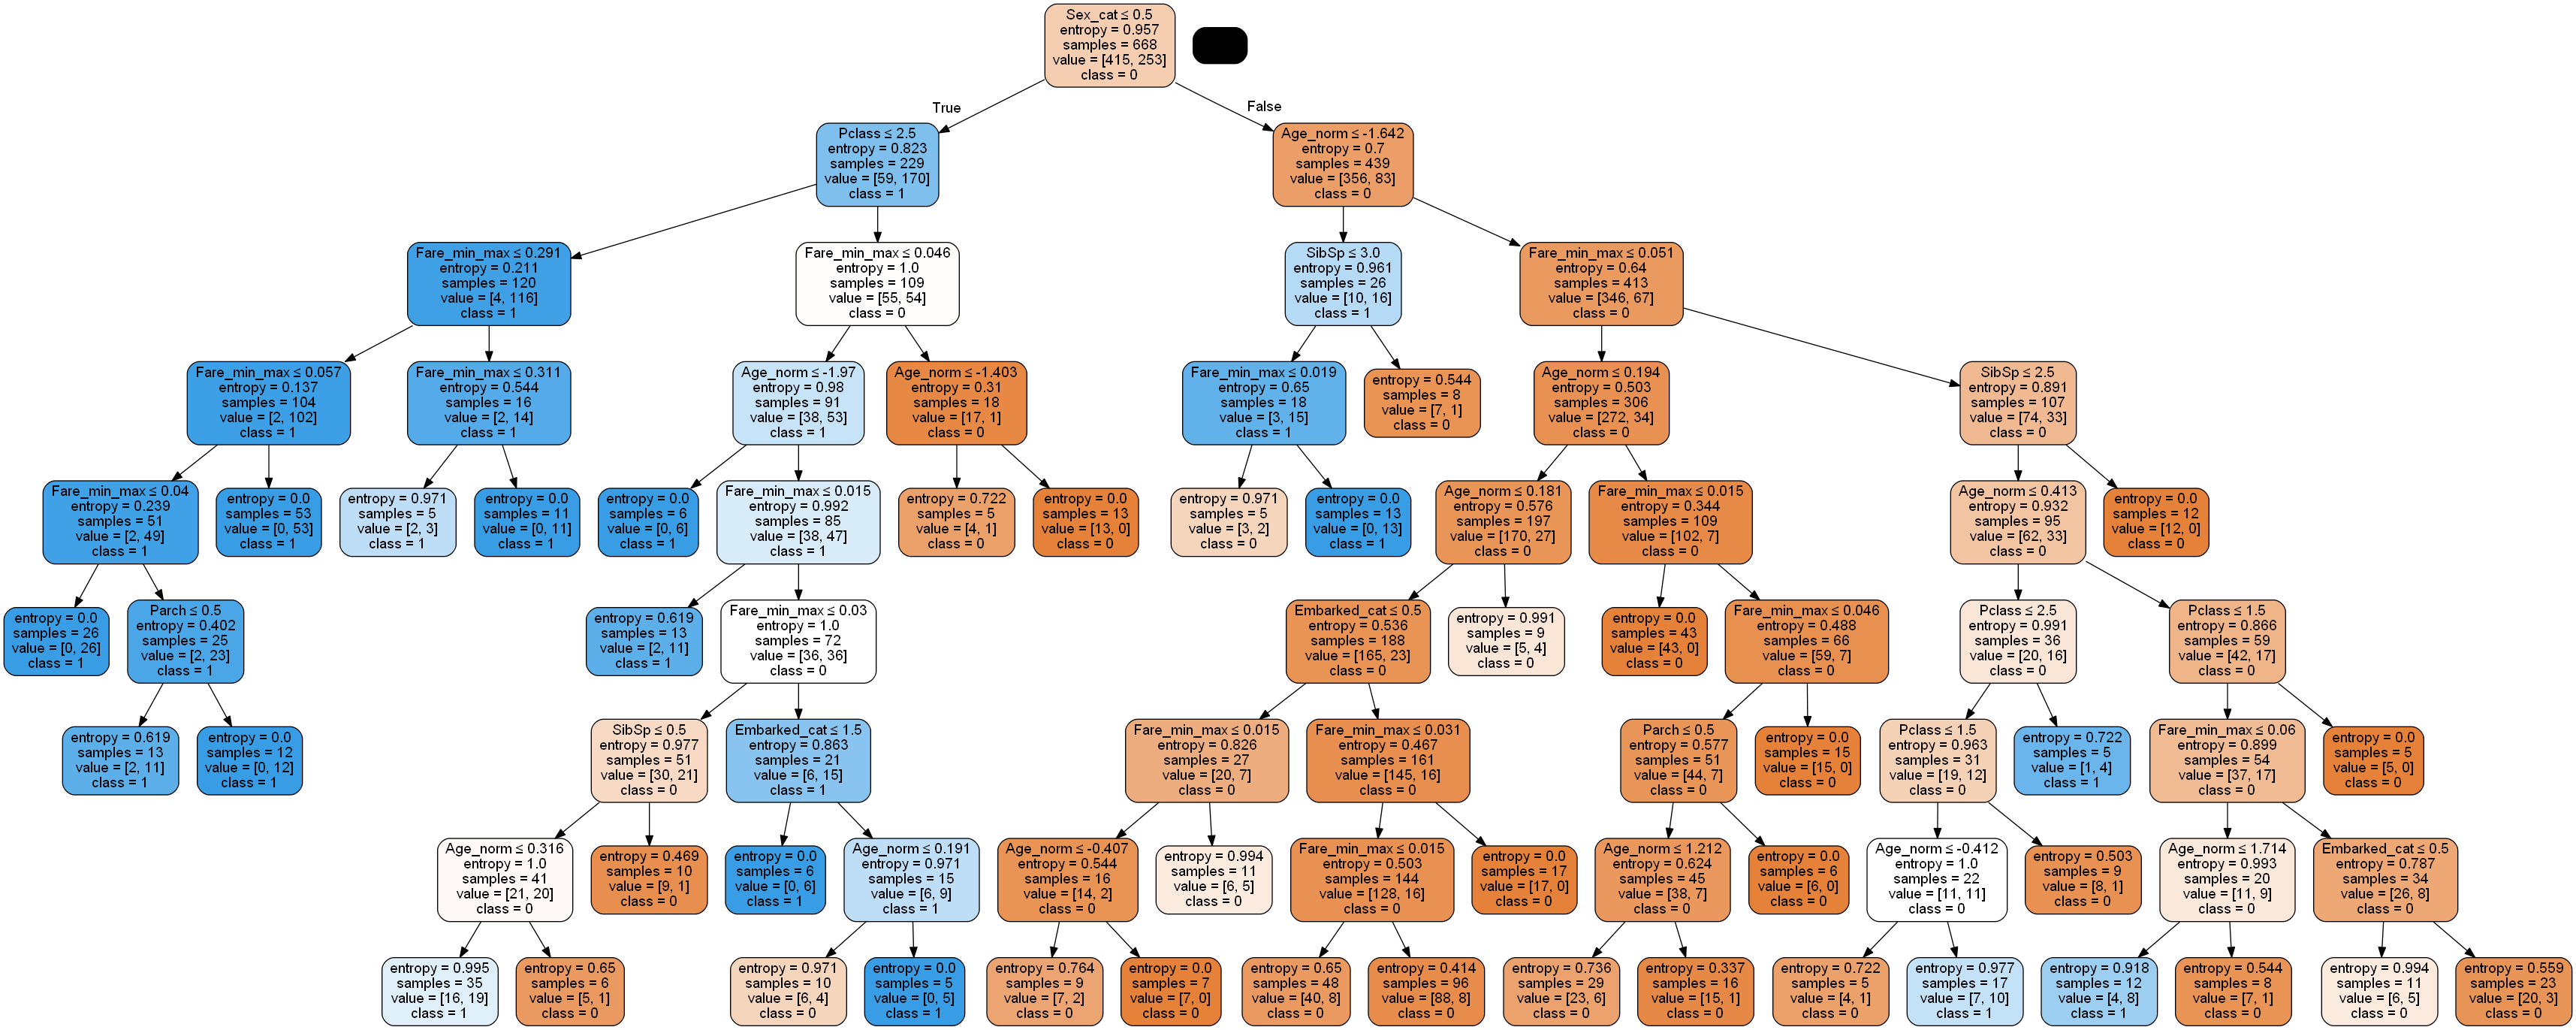

In [12]:
dot = export_graphviz(clf2, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('./data-tergul6/tree2.png')
Image(graph.create_png())

#### train

In [13]:
y_train_pred2 = clf2.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred2))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred2))

0.8667664670658682


0    1
0  381   34
1   55  198

#### test

In [14]:
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred2))

0.7982062780269058


0   1
0  113  21
1   24  65

Let's see how a single parameter can affect the performances, in the <b> train </b> and in the <b> test </b>:

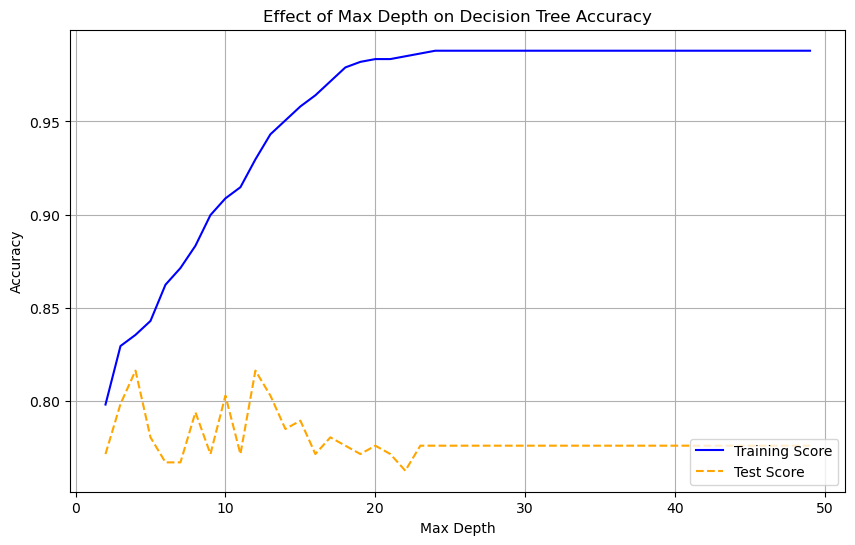

In [15]:
train_scores, test_scores = [], []

for k in range(2, 50):
    clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                  max_depth=k, random_state=42) 
    clf3.fit(X_train, y_train)
    train_scores.append(clf3.score(X_train, y_train))
    test_scores.append(clf3.score(X_test, y_test))
    
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(2, 50), train_scores, linestyle='-', color='blue')
ax.plot(range(2, 50), test_scores, linestyle='--', color='orange')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Effect of Max Depth on Decision Tree Accuracy')

ax.legend(['Training Score', 'Test Score'], loc='lower right')
ax.grid()

plt.show()

### Changing the splits to be by category

In [16]:
X.head()

Pclass  SibSp  Parch  Sex_cat  Embarked_cat  Title_cat  Is_Alone  \
0       3      1      0        1             2          2         0   
1       1      1      0        0             0          3         0   
2       3      0      0        0             2          1         1   
3       1      1      0        0             2          3         0   
4       3      0      0        1             2          2         1   

   Fare_min_max  Age_norm  
0      0.014151 -0.517838  
1      0.139129  0.615799  
2      0.015478 -0.234429  
3      0.103644  0.403242  
4      0.015713  0.403242

In [17]:
for col in X:
    print(col, len(X[col].unique()))

Pclass 3
SibSp 7
Parch 7
Sex_cat 2
Embarked_cat 3
Title_cat 5
Is_Alone 2
Fare_min_max 234
Age_norm 219


In [18]:
dummies_col = []
for col in df:
    unique_values = len(df[col].unique())
    if 2 < unique_values < 8:
        dummies_col.append(col)

X_dummies = pd.get_dummies(data=X, columns=dummies_col).astype(float)

X_dummies.head()


Sex_cat  Is_Alone  Fare_min_max  Age_norm  Pclass_1  Pclass_2  Pclass_3  \
0      1.0       0.0      0.014151 -0.517838       0.0       0.0       1.0   
1      0.0       0.0      0.139129  0.615799       1.0       0.0       0.0   
2      0.0       1.0      0.015478 -0.234429       0.0       0.0       1.0   
3      0.0       0.0      0.103644  0.403242       1.0       0.0       0.0   
4      1.0       1.0      0.015713  0.403242       0.0       0.0       1.0   

   SibSp_0  SibSp_1  SibSp_2  ...  Parch_5  Parch_6  Embarked_cat_0  \
0      0.0      1.0      0.0  ...      0.0      0.0             0.0   
1      0.0      1.0      0.0  ...      0.0      0.0             1.0   
2      1.0      0.0      0.0  ...      0.0      0.0             0.0   
3      0.0      1.0      0.0  ...      0.0      0.0             0.0   
4      1.0      0.0      0.0  ...      0.0      0.0             0.0   

   Embarked_cat_1  Embarked_cat_2  Title_cat_0  Title_cat_1  Title_cat_2  \
0             0.0             1.0          0.0          0.0          1.0   
1             0.0             0.0          0.0          0.0          0.0   
2             0.0             1.0          0.0          1.0          0.0   
3             0.0             1.0          0.0          0.0          0.0   
4             0.0             1.0          0.0          0.0          1.0   

   Title_cat_3  Title_cat_4  
0          0.0          0.0  
1          1.0          0.0  
2          0.0          0.0  
3          1.0          0.0  
4          0.0          0.0  

[5 rows x 29 columns]

In [19]:
X_train_d, X_test_d, y_train, y_test = train_test_split(X_dummies, y, test_size=0.25, random_state=42) 

In [20]:
clf3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=15, min_samples_leaf=5, random_state=42) 

clf3 = clf3.fit(X_train_d,y_train)

In [21]:
y_pred3 = clf3.predict(X_test_d)
print(metrics.accuracy_score(y_test, y_pred3))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred3))

0.8071748878923767


0   1
0  111  23
1   20  69

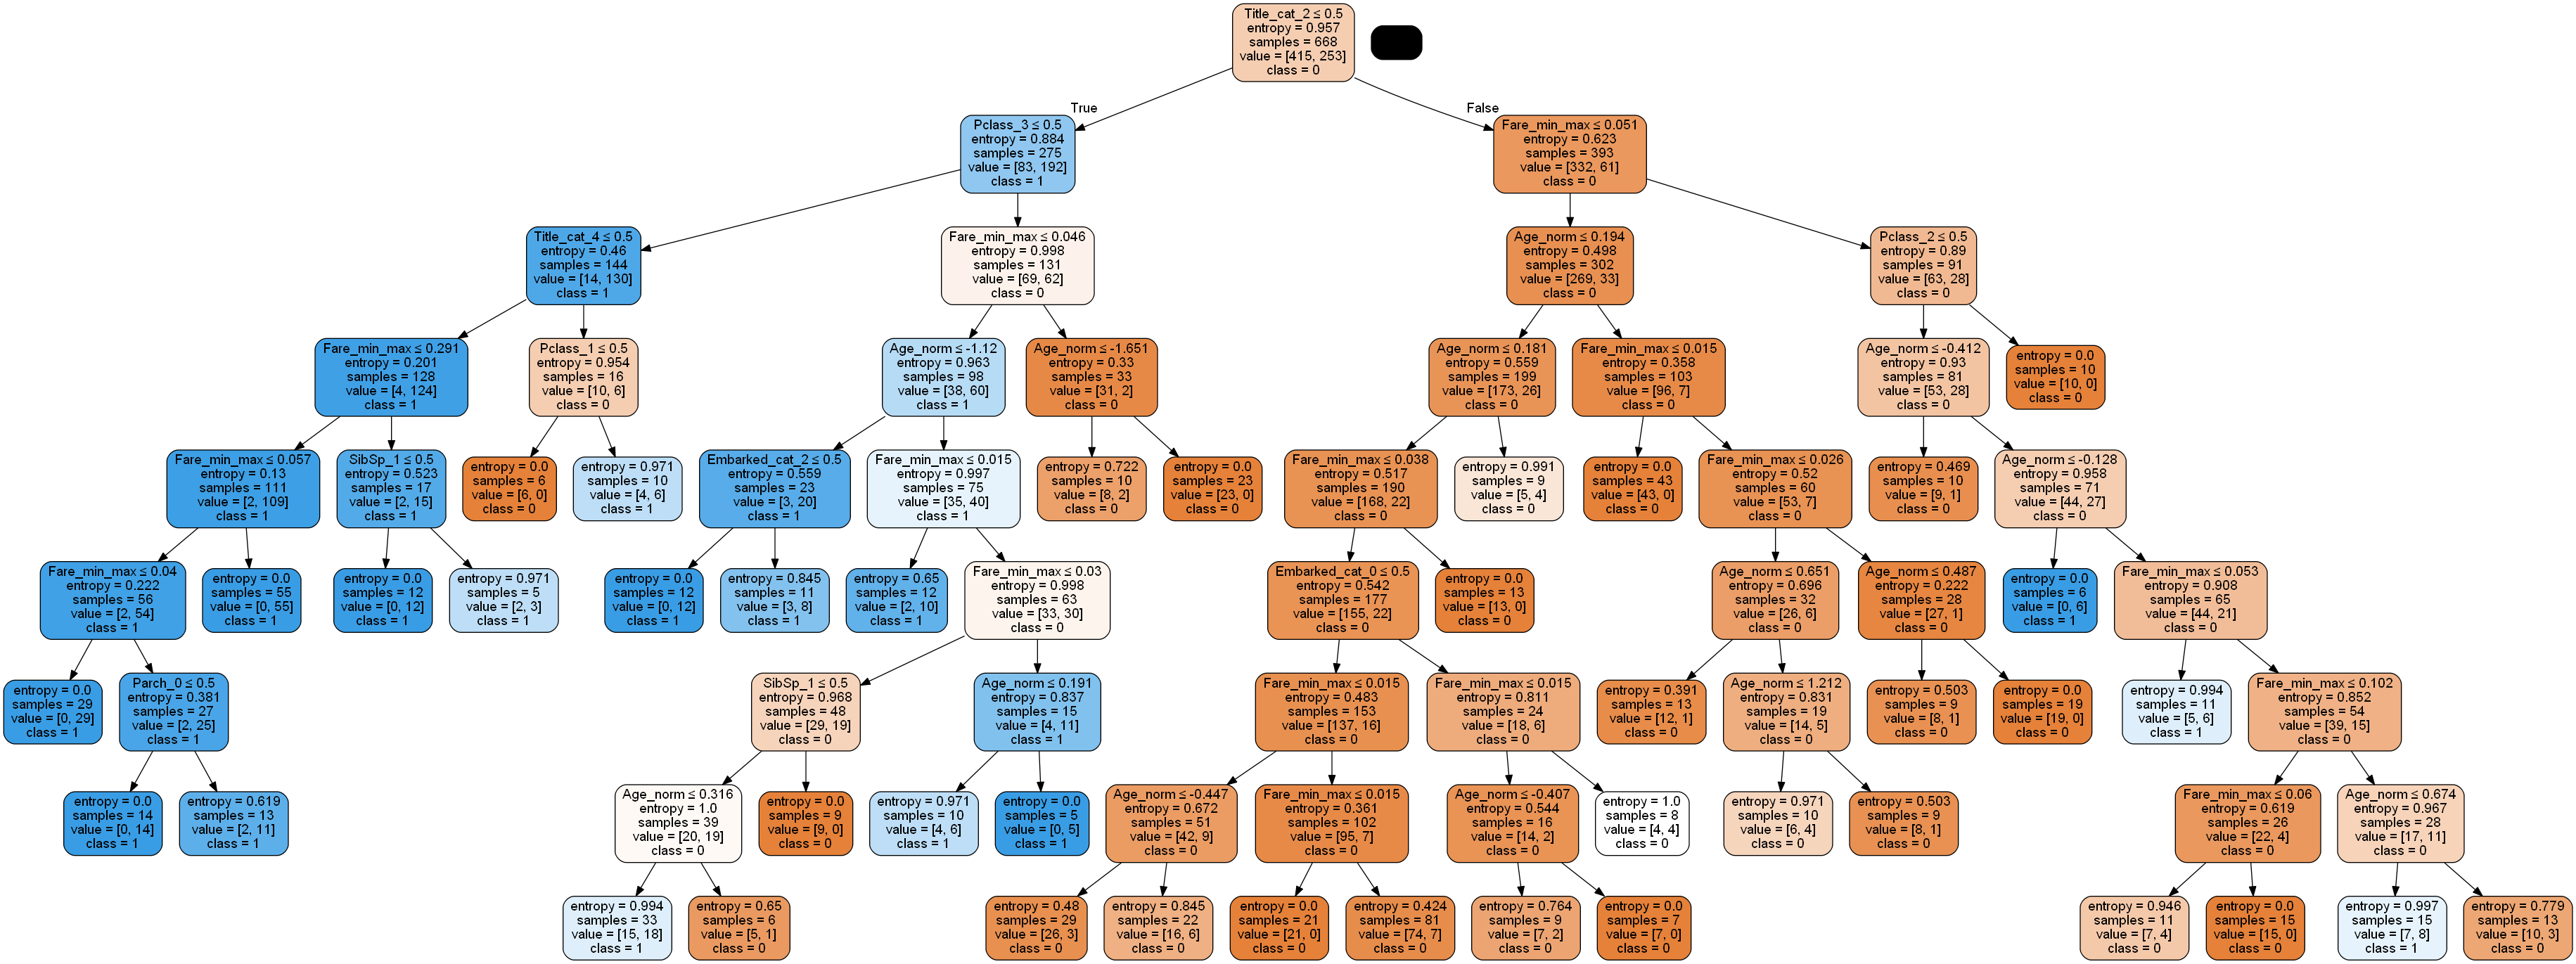

In [22]:
dot = export_graphviz(clf3, filled=True, rounded=True, 
                special_characters=True,feature_names = X_dummies.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('./data-tergul6/tree3.png')
Image(graph.create_png())

## Model evaluation
Comparison between two models by using cross-validation to get average results.

In [23]:
clf_a = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=8, min_samples_split=15, min_samples_leaf=5, random_state=42)
clf_b = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                          max_depth=8, min_samples_split=15, min_samples_leaf=5, random_state=42)

X = X.to_numpy()
X_dummies = X_dummies.to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cm_a, cm_b = [], []
accuracy_a, accuracy_b = [], []
recall_a, recall_b = [], []
precision_a, precision_b = [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    X_train_d, X_test_d = X_dummies[train_index], X_dummies[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf_a.fit(X_train, y_train)
    clf_b.fit(X_train_d, y_train)
    
    y_pred_a = clf_a.predict(X_test)
    y_pred_b = clf_b.predict(X_test_d)
    
    cm_a.append(metrics.confusion_matrix(y_test, y_pred_a))
    cm_b.append(metrics.confusion_matrix(y_test, y_pred_b))
    accuracy_a.append(metrics.accuracy_score(y_test, y_pred_a))
    accuracy_b.append(metrics.accuracy_score(y_test, y_pred_b))
    recall_a.append(metrics.recall_score(y_test, y_pred_a))
    recall_b.append(metrics.recall_score(y_test, y_pred_b))
    precision_a.append(metrics.precision_score(y_test, y_pred_a))
    precision_b.append(metrics.precision_score(y_test, y_pred_b))
    

Calculate mean accuracy for each of the models.

In [24]:
np.mean(accuracy_a)

0.8182286108844391

In [25]:
np.mean(accuracy_b)

0.814776222459356

### What is the evaluation metric we should use in this problem?
Confusion matrix: 

|  | predicted negative | predicted positive |
|:--- | :---: | :---: |
| actual negative | TN | FP|
| actual positive | FN | TP|

- sensitivity = recall =  $ \frac{TP}{TP+FN} $ 
- specificity = $ \frac{TN}{TN +FP} $
- precision = $ \frac{TP}{TP+FP}$



In [26]:
np.mean(recall_a)

0.6584885707273767

In [27]:
np.mean(recall_b)

0.708732775896955

In [28]:
results = {
    'Accuracy_noraml': accuracy_a,
    'Accuracy_Binary': accuracy_b,
    'Recall_noraml': recall_a,
    'Recall_Binary': recall_b,
    'Precision_noraml': precision_a,
    'Precision_Binary': precision_b
}

results_df = pd.DataFrame(results)
mean_values = results_df.mean()
results_df.loc['Mean'] = mean_values
results_df

Accuracy_noraml  Accuracy_Binary  Recall_noraml  Recall_Binary  \
0            0.776536         0.849162       0.581081       0.756757   
1            0.803371         0.814607       0.656716       0.701493   
2            0.865169         0.848315       0.771429       0.771429   
3            0.803371         0.747191       0.590909       0.590909   
4            0.842697         0.814607       0.692308       0.723077   
Mean         0.818229         0.814776       0.658489       0.708733   

      Precision_noraml  Precision_Binary  
0             0.826923          0.861538  
1             0.785714          0.783333  
2             0.870968          0.830769  
3             0.829787          0.684211  
4             0.849057          0.758065  
Mean          0.832490          0.783583